In [28]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import is3_broker_rl
import matplotlib.pyplot as plt
from pathlib import Path

In [29]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [30]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""
COMMENTS = ""


In [31]:
print(COMMENTS)

What did I try here?


In [32]:
#path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [33]:
ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

### Reward analysis

In [34]:
df_reward = pd.read_csv(os.path.join(ANALYSIS_DIR,reward_prefix))


In [35]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [36]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [37]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/tmp/ipykernel_3759/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_3759/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_3759/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [38]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return","sum_mWh"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13252 entries, 0 to 13251
Columns: 352 entries, energy_1 to sum_mWh
dtypes: float64(349), int64(2), object(1)
memory usage: 35.6+ MB


In [39]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

17       54633
23       53493
29       52569
89       57393
107      55329
         ...  
13220    50573
13226    50566
13238    50559
13244    50538
13250    50531
Name: customer_count, Length: 959, dtype: int64

In [40]:
df.iloc[5300:8000][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","customer_count"]].tail(50)

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,customer_count
7950,57496,-0.110444,-0.113317,0.002874,-1.189307,57496
7951,57496,-0.345298,-0.343032,-0.002266,-1.960651,57496
7952,57496,-0.355694,-0.355851,0.000157,-2.010379,57496
7953,57496,-0.127930,-0.132126,0.004196,-1.277175,57496
7954,57496,-0.375282,-0.374620,-0.000662,-2.078062,57496
7955,54685,-0.018873,-0.011925,-0.006948,-0.506197,54685
7956,54685,-0.152453,-0.152603,0.000151,-1.401893,54685
7957,54685,-0.181598,-0.167386,-0.014212,-1.451902,54685
7958,54685,-0.158305,-0.158412,0.000106,-1.402059,54685
7959,54685,-0.137780,-0.134944,-0.002836,-1.280860,54685


In [41]:
df[df["reward"]< -0.3 ]

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return,sum_mWh
23,42.271483,-9.492537,-7.750756,89.370269,-27.448359,33.845216,-26.577869,64.442891,39.161408,-31.075191,...,0.0,0.0,0.0,0.0,0.0,-0.305741,-0.305924,0.000183,-1.836671,36.332900
151,-43.751851,3.826311,-32.825941,76.901007,24.361455,-57.532632,-47.337574,4.917938,40.934592,-38.094461,...,0.0,0.0,0.0,1.0,0.0,-0.387523,-0.373330,-0.014193,-2.059290,14.070969
165,36.296809,-39.694789,-39.710388,89.993691,-18.858781,70.343429,34.315026,-60.283065,-49.905795,89.690965,...,0.0,0.0,0.0,1.0,0.0,-0.301808,-0.294368,-0.007440,-1.823928,37.607166
166,18.565053,-76.052755,-34.459645,52.320421,15.346348,-91.992807,15.412545,-49.474725,31.987739,-99.596441,...,0.0,0.0,0.0,0.0,1.0,-0.309185,-0.299745,-0.009440,-1.845802,33.680676
262,-8.332855,2.271840,17.508167,-83.544618,40.701973,-2.772555,45.508260,-88.637400,40.047014,-94.771624,...,0.0,1.0,0.0,0.0,0.0,-0.305654,-0.295057,-0.010597,-1.813843,35.137399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13063,-20.143068,60.780525,27.230537,-8.046329,35.644281,-12.934414,47.987771,-87.086415,-21.540391,9.883785,...,0.0,0.0,0.0,1.0,0.0,-0.310504,-0.298692,-0.011812,-1.876697,14.284764
13074,26.397949,-99.289346,4.566598,-85.012335,48.102868,-97.997940,18.203574,-79.343438,-6.016842,77.659482,...,0.0,0.0,0.0,1.0,0.0,-0.314863,-0.312665,-0.002197,-1.909418,25.996458
13139,9.486037,-71.199328,19.821489,-80.830687,32.180673,-75.736851,-40.588155,36.527032,2.148426,-61.909884,...,0.0,0.0,0.0,0.0,0.0,-0.344765,-0.344536,-0.000228,-0.888550,66.336811
13182,27.776474,-34.164405,-22.200504,46.383670,15.713263,-95.070434,18.354815,-69.247627,-37.456715,83.375537,...,0.0,1.0,0.0,0.0,0.0,-0.306434,-0.296052,-0.010382,-0.778167,34.328015


In [42]:
df_reward_rolling = df_reward["reward"].rolling(20).mean().dropna()
df_balancing_reward = df_reward["balancing_reward"].rolling(5).mean().dropna()
df_wholesale_reward = df_reward["wholesale_reward"].rolling(5).mean().dropna()
df_tariff_reward = df_reward["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

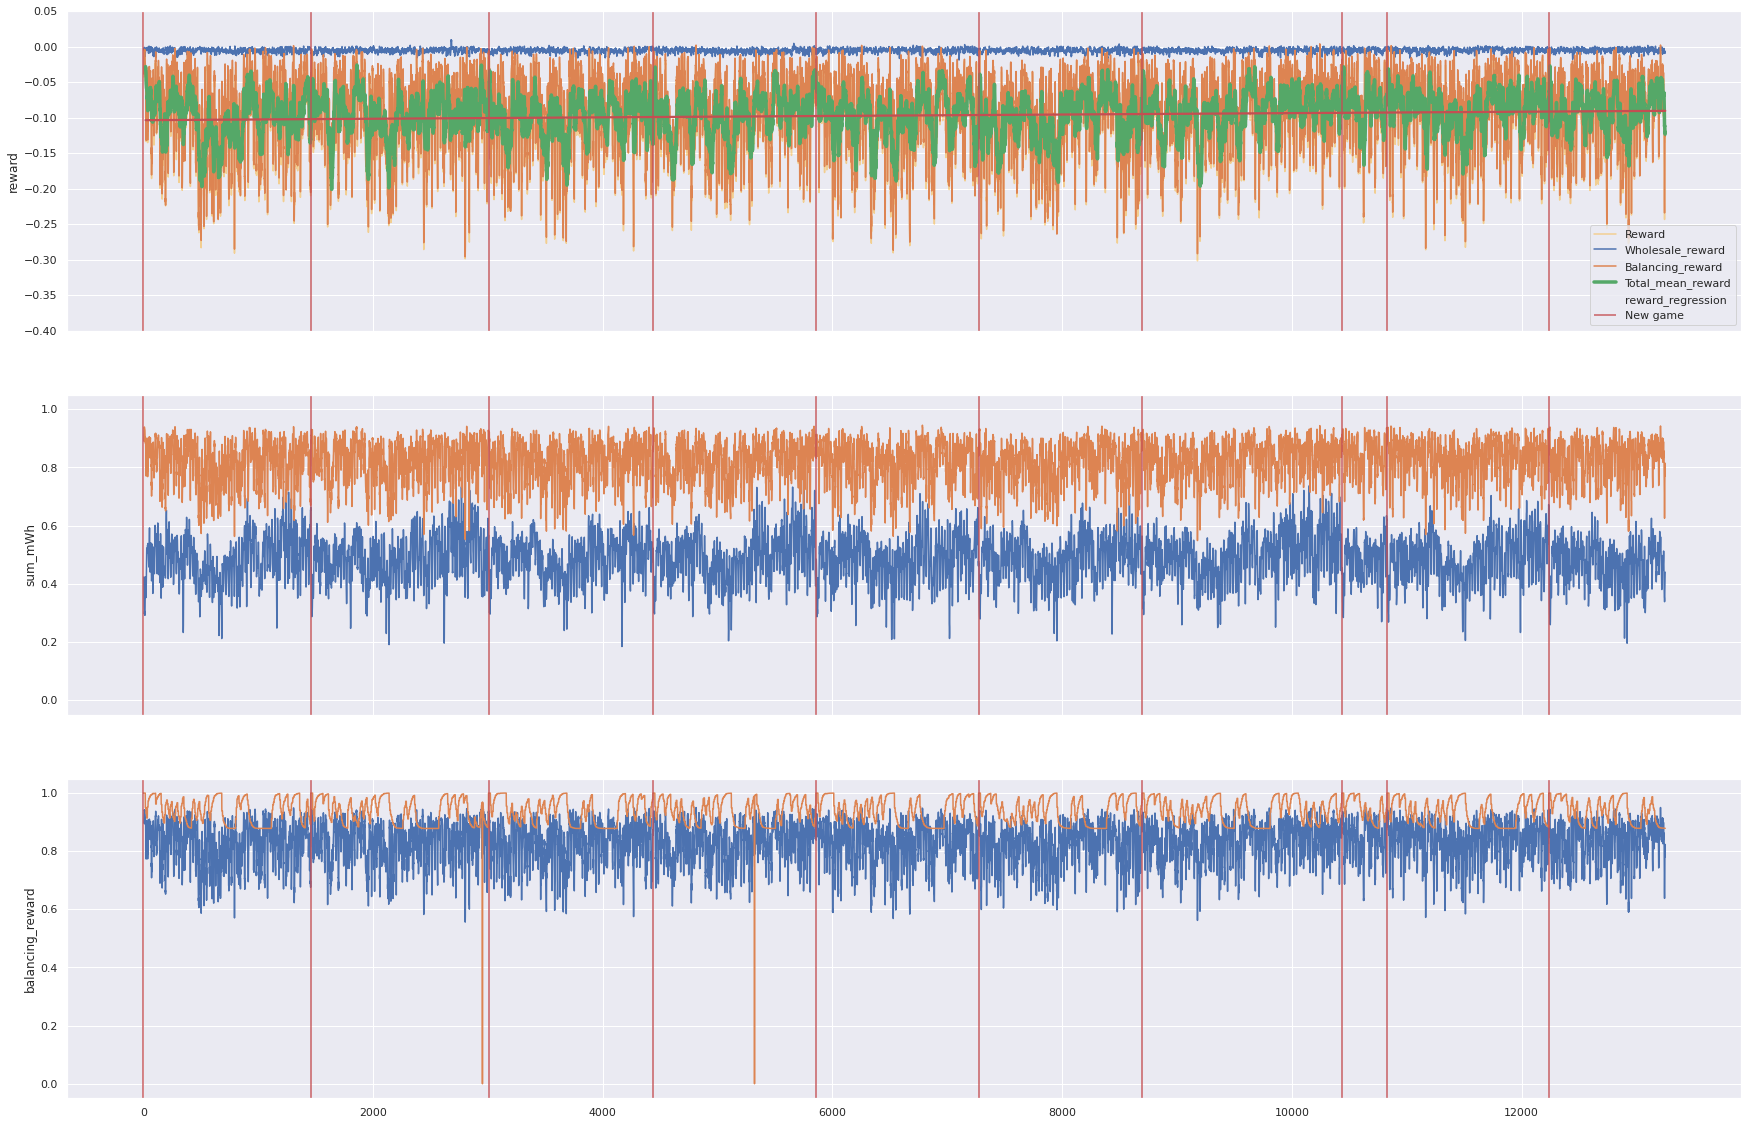

In [43]:

sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(3, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

graph7 = sns.lineplot(x=df_reward.index, y=df_reward["reward"].rolling(5).mean(), color="orange", ax=axs[0], alpha=0.4, label="Reward")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward")
graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5)
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[1])
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-0.4,0.05)
f.set_figwidth(30)
f.set_figheight(20)


In [44]:
df.iloc[df.index < 2365]["cleared_orders_energy_23"].max()

49.785621643066406

In [45]:
df["timeslot"]

0         362
1         363
2         364
3         365
4         366
         ... 
13247    1372
13248    1373
13249    1374
13250    1375
13251    1376
Name: timeslot, Length: 13252, dtype: int64

In [46]:
# Or just use shift?
index_slot = 201
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[(index_slot - i)][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[index_slot - i +1][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[index_slot -i+1][f"market_position_{i}"]
    sum_mwh = df.iloc[index_slot +1]["sum_mWh"]
    index_slot_list = df.iloc[index_slot-i+1].name
    predicted_prosumption=df.iloc[index_slot-i+1][f"p_customer_prosumption_{i}"]/1000
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position, sum_mwh, index_slot_list, predicted_prosumption])

df_action_analysis = pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_trade_order", "price_trade_order", "market_position", "sum_mWh", "index_slot", "predicted_prosumption"])
df_action_analysis

,energy_action,price_action,energy_trade_order,price_trade_order,market_position,sum_mWh,index_slot,predicted_prosumption
0,-9.722677,91.030020,0.000000,0.000000,67.630117,55.390514,202,-10.258062
1,27.833503,-33.908385,18.699944,-42.375596,67.630117,55.390514,201,-8.635391
2,-15.452641,99.518985,0.000000,0.000000,48.930173,55.390514,200,-10.010097
3,-5.799964,75.544775,0.000000,0.000000,48.930173,55.390514,199,-10.200062
4,15.685946,-47.051772,10.271419,-41.408869,48.930173,55.390514,198,-9.990668
5,-47.155410,84.497130,30.435198,-39.115592,38.658754,55.390514,197,-9.347996
6,-10.135293,84.582937,0.000000,0.000000,8.223557,55.390514,196,-8.425037
7,42.803210,-90.490073,-4.566959,22.854551,8.223557,55.390514,195,-6.646145
8,-49.611336,49.222794,-5.835647,15.372207,14.321028,55.390514,194,-5.388889
9,48.199612,-31.079626,8.795458,-38.612699,21.367537,55.390514,193,-4.574760


In [47]:
df_action_analysis.style.background_gradient(cmap="bwr")

,energy_action,price_action,energy_trade_order,price_trade_order,market_position,sum_mWh,index_slot,predicted_prosumption
0,-9.722677,91.030020,0.000000,0.000000,67.630117,55.390514,202,-10.258062
1,27.833503,-33.908385,18.699944,-42.375596,67.630117,55.390514,201,-8.635391
2,-15.452641,99.518985,0.000000,0.000000,48.930173,55.390514,200,-10.010097
3,-5.799964,75.544775,0.000000,0.000000,48.930173,55.390514,199,-10.200062
4,15.685946,-47.051772,10.271419,-41.408869,48.930173,55.390514,198,-9.990668
5,-47.155410,84.497130,30.435198,-39.115592,38.658754,55.390514,197,-9.347996
6,-10.135293,84.582937,0.000000,0.000000,8.223557,55.390514,196,-8.425037
7,42.803210,-90.490073,-4.566959,22.854551,8.223557,55.390514,195,-6.646145
8,-49.611336,49.222794,-5.835647,15.372207,14.321028,55.390514,194,-5.388889
9,48.199612,-31.079626,8.795458,-38.612699,21.367537,55.390514,193,-4.574760


In [48]:
i = 0
index_slot = 201
df.iloc[index_slot][[*[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"], f"market_position_{i}", "sum_mWh", f"p_customer_prosumption_{i}"]]
#[*[f"sum_mWh", "price_1"], *["price_2", "test3"]]
#[*["test", "test2"],*["test3", "test4"]]

cleared_orders_energy_0              0.0
cleared_orders_price_0               0.0
market_position_0              86.738881
sum_mWh                        60.465687
p_customer_prosumption_0   -10117.652344
Name: 201, dtype: object

In [49]:
df[["price_24","energy_24"]].iloc[177]

price_24     42.300737
energy_24   -36.886936
Name: 177, dtype: float64

In [50]:
a = df.iloc[df.index <201][[x for x in df.columns if (x.startswith("energy_") | (x.startswith("price_")))]]
a.iloc[a.index > 170].T

,171,172,173,174,175,176,177,178,179,180,...,191,192,193,194,195,196,197,198,199,200
energy_1,-40.452781,22.785521,-41.114095,13.483286,16.341805,40.875006,-0.202358,15.636945,39.664805,-17.109030,...,-40.117314,28.292203,-22.540218,9.146655,13.735080,-37.394336,10.293061,43.868399,10.117763,4.424024
price_1,6.502539,-87.202895,60.015857,-66.133595,-61.839819,-15.961924,94.349498,-32.088408,-16.359442,70.520520,...,85.431802,-59.203714,38.964584,-89.415538,-26.837331,82.609099,-95.345342,-24.059004,-59.636402,-44.452351
energy_2,-24.292770,-26.901206,-40.017450,29.708171,10.055095,6.937528,-17.347720,-36.258847,-17.057520,11.668670,...,-21.474206,-37.749362,-16.047829,-44.595435,-11.917371,44.799018,19.785917,13.495654,18.699944,27.833503
price_2,31.919250,77.251160,2.843812,-89.050812,-64.451206,-93.279570,38.007087,67.372292,73.011136,-95.703387,...,8.757702,19.576082,4.009235,67.849284,44.772023,-97.333348,-54.233378,-7.926911,-96.388072,-33.908385
energy_3,-26.117471,46.066117,49.451482,-45.176670,-32.083291,-24.888250,18.969196,21.332145,-49.522287,29.246950,...,-12.345490,-44.074664,12.489367,29.097247,7.372445,-21.457011,43.796420,-19.932303,-15.452641,-27.158082
price_3,12.760356,-15.572816,-8.720413,31.794810,31.520894,86.245680,-91.822737,-54.260933,10.183740,-9.373549,...,10.066414,61.249429,-48.189908,-26.431140,-95.033830,86.270726,-13.258791,96.801531,99.518985,92.771012
energy_4,8.082622,-17.355078,45.504284,-45.264751,33.350694,37.345088,-20.260006,-41.523859,25.289786,-26.878476,...,-47.893384,-15.848359,-17.462957,-31.659639,-39.291921,23.715162,-7.145697,-5.799964,39.350969,27.018112
price_4,-72.568470,58.685827,-2.333865,83.712000,-46.561074,-23.165655,43.694997,75.270414,-95.822883,15.618789,...,1.860222,38.248092,76.890951,5.125776,96.743655,-32.149822,90.606648,75.544775,-8.404237,-47.839582
energy_5,-42.617992,-38.039327,-44.681576,31.938505,0.908154,-4.708868,33.738434,44.296002,-44.682541,47.126019,...,-26.238549,-11.462617,-19.894189,-19.113496,-32.223383,10.271418,15.685946,46.910691,14.338416,-23.822361
price_5,69.036794,46.923953,80.757844,-4.279843,-69.160473,72.846562,-62.127805,-4.566059,46.042943,-24.714714,...,72.487605,18.290374,60.326177,28.350478,66.339988,-76.958156,-47.051772,-13.356152,-45.295289,31.612223


In [51]:
energy_price_bid

array([-44.87596154212952, 69.15802955627441], dtype=object)

In [52]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

market_position_2 -0.5571398476135276
total_prosumption -0.2054155557165151
p_grid_imbalance_4 -0.20079990357264227
p_grid_imbalance_5 -0.1996195965518977
p_grid_imbalance_7 -0.19141951073055266
p_grid_imbalance_6 -0.19078186823104024
p_grid_imbalance_8 -0.172658043342364
p_grid_imbalance_3 -0.1697985622357936
p_grid_imbalance_9 -0.13950845615103602
hour_of_day_0 -0.13437006005047375
hour_of_day_23 -0.13347681490258298
market_position_0 -0.11858566440836968
p_grid_imbalance_2 -0.118240014559005
market_position_1 -0.11771272114361601
market_position_3 -0.11706653688771237
market_position_4 -0.11294851393208474
hour_of_day_22 -0.11034560868584375
hour_of_day_1 -0.09215910620431354
p_temperature_11 -0.09057684958021288
p_temperature_12 -0.0894875721528541
p_wind_speed_11 -0.089237083127841
day_of_week_5 -0.0888947087605909
p_wholesale_price_8 -0.08668673556043599
market_position_5 -0.08661909803251777
p_grid_imbalance_10 -0.08386371818535734
hour_of_day_21 -0.08350823707186206
p_temperatu

In [54]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
0,3.159721,362,0.000000,64.195619,61.035898
1,1.030662,363,0.000000,40.904164,39.873502
2,2.332565,364,0.000000,41.442544,39.109979
3,2.476563,365,-1.474410,28.667710,26.191147
4,2.834549,366,17.283201,26.128980,23.294431
...,...,...,...,...,...
13247,8.918005,1372,144.070388,47.273745,38.355740
13248,8.246166,1373,48.104754,39.711198,31.465032
13249,7.584929,1374,132.155327,46.266765,38.681836
13250,9.527495,1375,211.280693,40.508440,30.980944


### Action analysis

In [100]:
#f,axs = plt.subplots(1,1,figsize=(25,25))
#for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
#    ax = sns.histplot(x=df[f"price_{i+1}"], y=df[f"energy_{i+1}"], data=df, hue="balancing_reward", ax=axs)
    

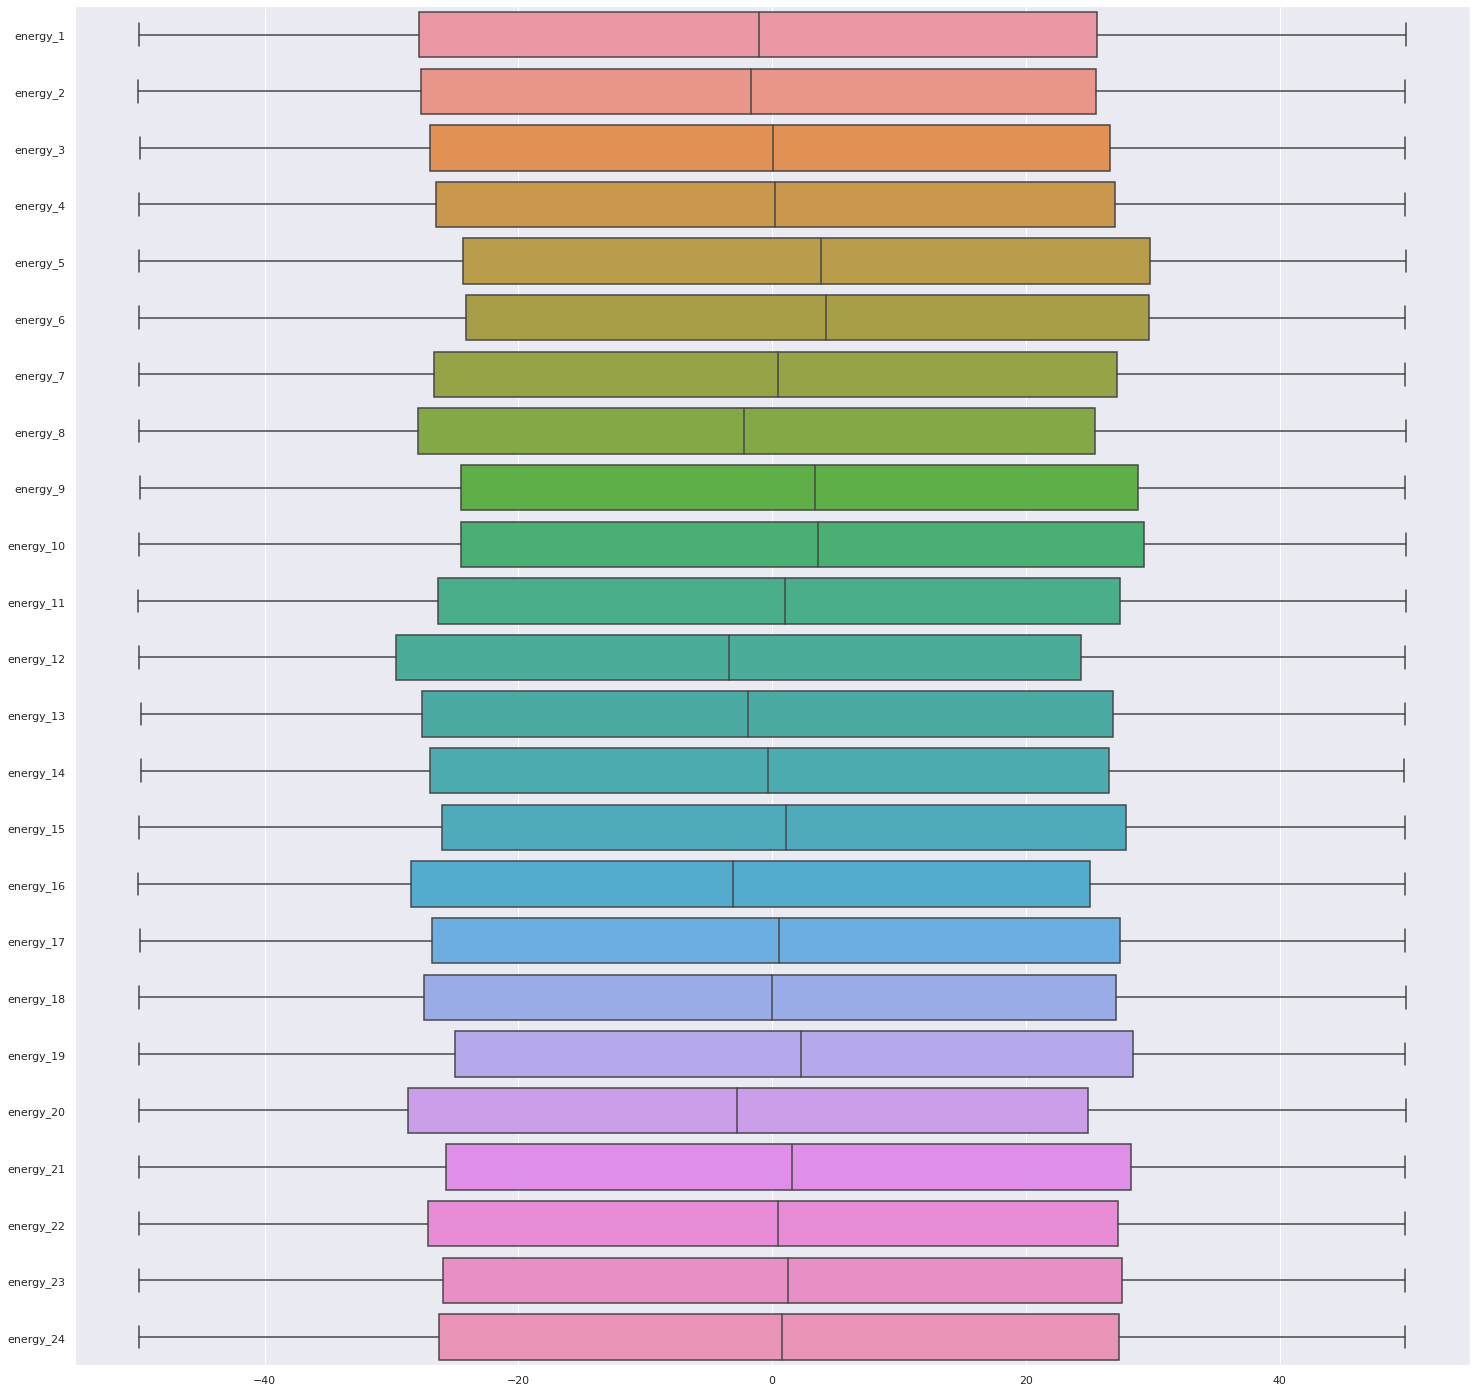

In [55]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[energy], orient="h")

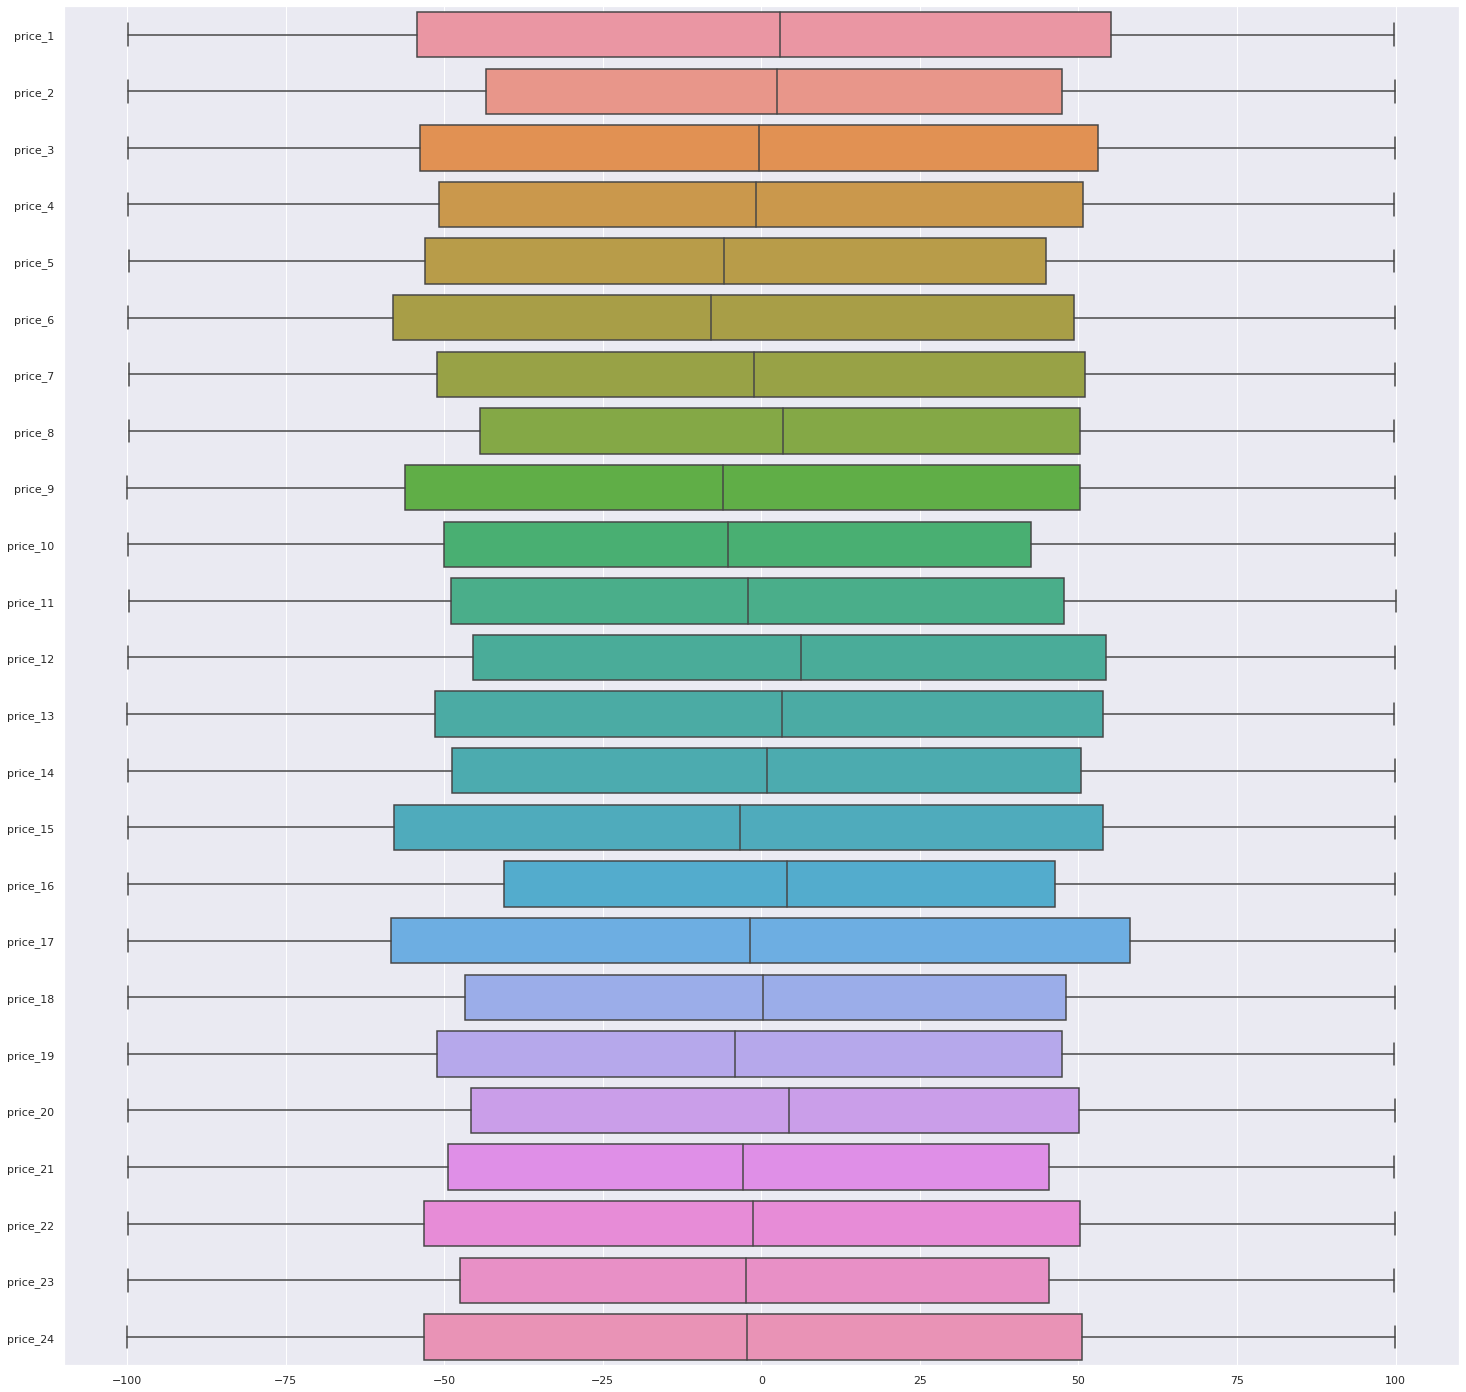

In [56]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[price],  orient="h")

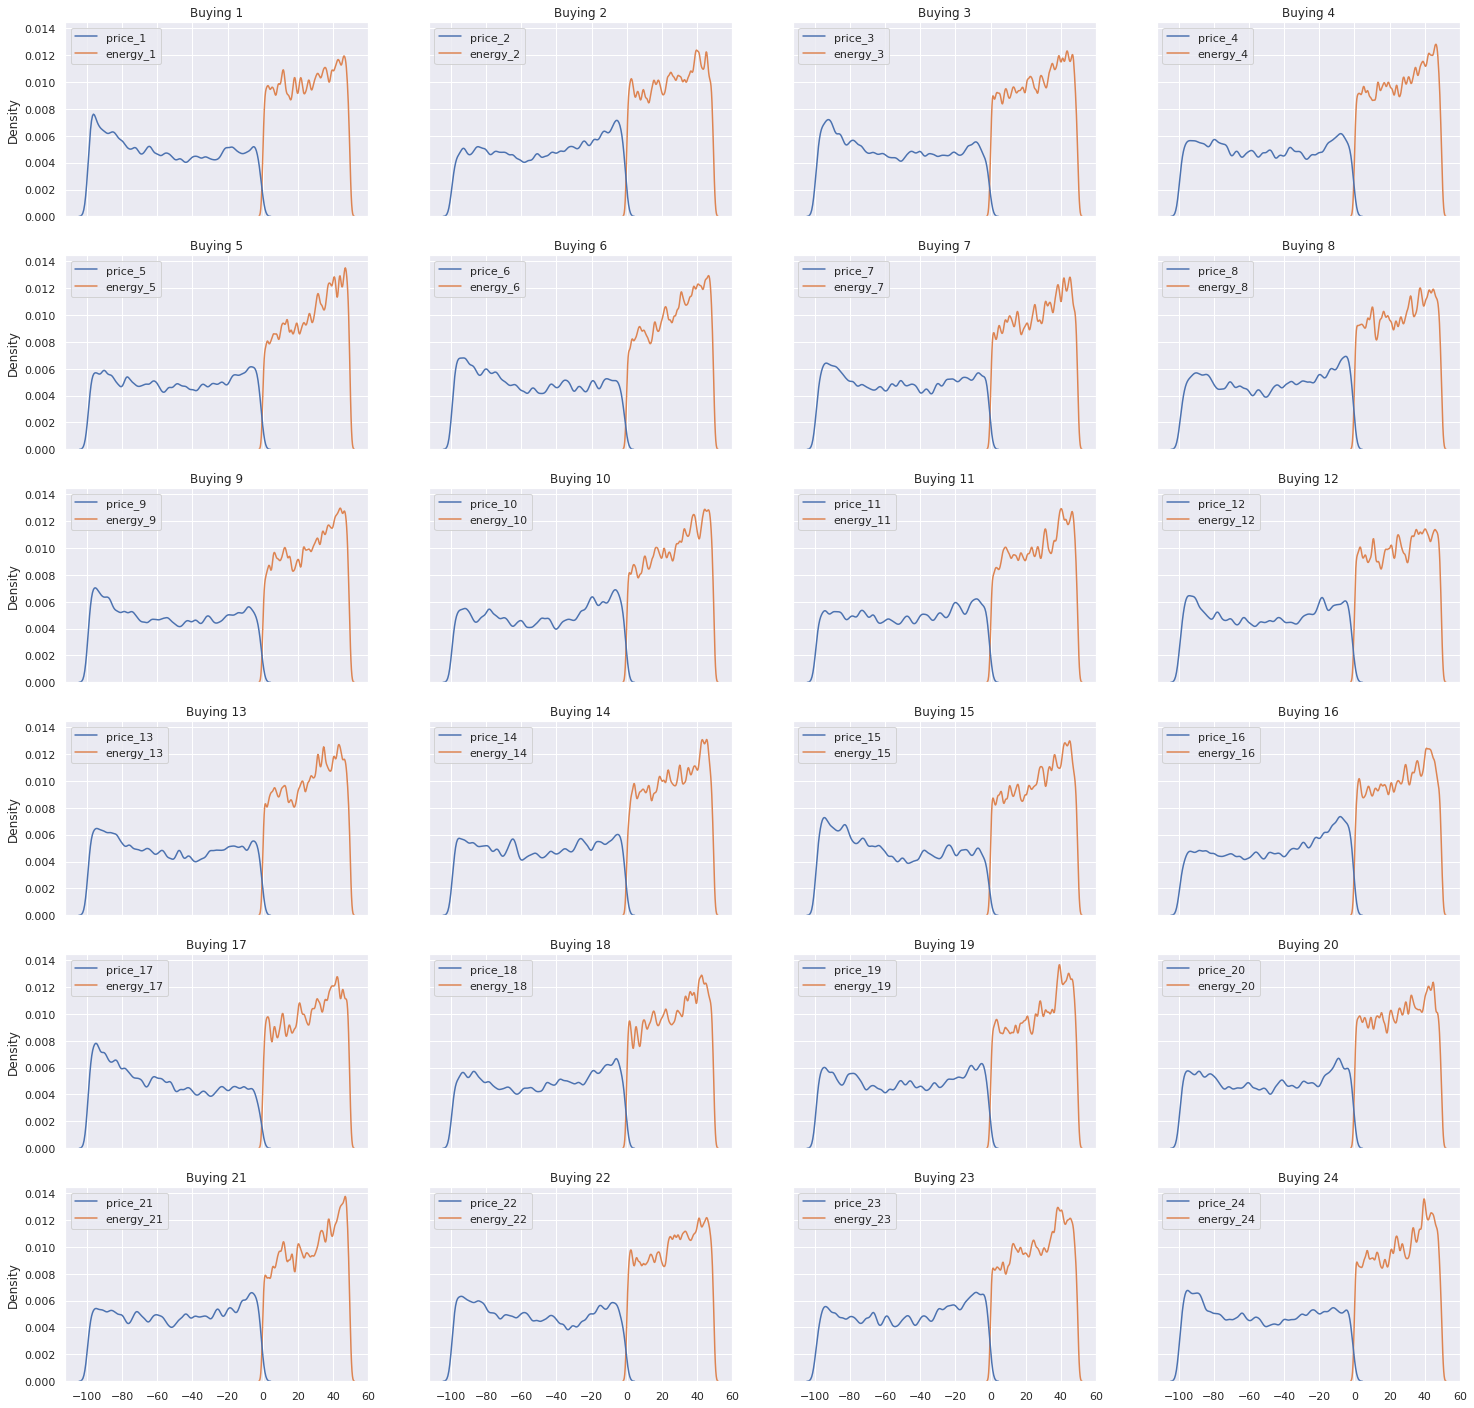

In [99]:
f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)

for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]<0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Buying {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)


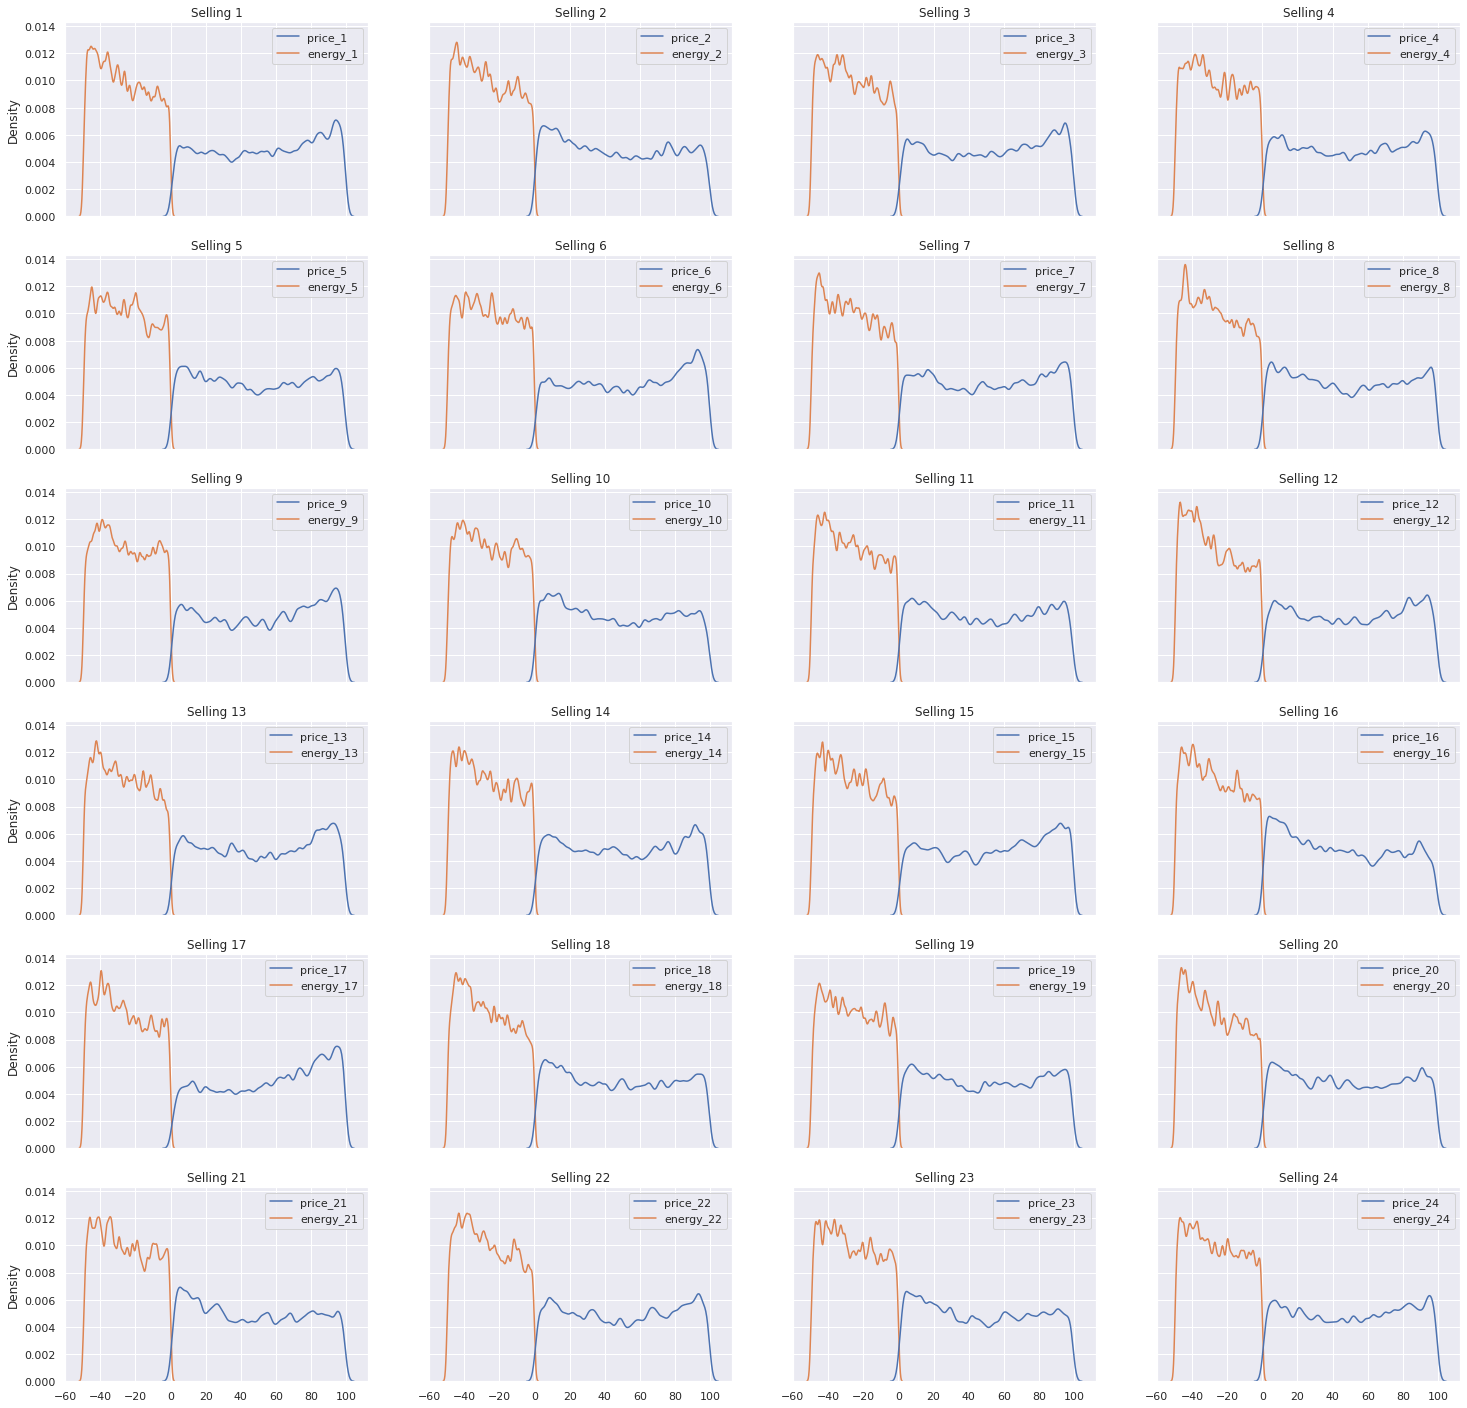

In [98]:
# Selling
from matplotlib.pyplot import title


f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)
for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]>0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Selling {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)